In [14]:

##### --------------------------------------------------------------- ####
#### Adaptive scheduling 2.0 : Can we do intelligent wifi scheduling? ####
##### ----------------------------------------------------------------####



In [44]:
# Import header files

import pandas as pd
import collections
import numpy as np
from sklearn.datasets import make_blobs
import hdbscan
import umap
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize objects
clusterer = hdbscan.HDBSCAN()


In [74]:
# Read and parse a sample wifistats.txt file

f = open("wifistats.txt","r")

# read text file into pandas DataFrame
#df = pd.read_table("wifistats.txt", delimiter="=")
df = pd.read_csv('wifistats.txt',delimiter='=',error_bad_lines=False)

#df.drop(df.iloc[:,6:], inplace=True, axis=1)

# The DataFrame should be a 2 dimensional data frame (m x n)
# Here m denotes time instant, n denotes features
# Each feature could be msdu_count_tqm from wifistats1, ppdu_recvd from wifistats2 ...

print(df.head())

# data=collections.defaultdict(list)
# temp=[]

# for line in  f:
#     if len(line)>1:
#         if 'UTC 2021' in line and temp:
#             data[line].append(temp)
#             temp=[] 
#         elif '=' in line:
#             temp.append(line)

# f.close()

# df = pd.DataFrame(data)

# df = df.transpose()



                      wifistats1 wifi1
0           HTT_TX_PDEV_STATS_CMN_TLV:
1                           wifistats2
2                  # wifistats wifi1 2
3            HTT_RX_PDEV_FW_STATS_TLV:
4  HTT_RX_PDEV_FW_RING_MPDU_ERR_TLV_V:


b'Skipping line 5: expected 1 fields, saw 2\nSkipping line 6: expected 1 fields, saw 2\nSkipping line 7: expected 1 fields, saw 2\nSkipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 15: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 21: expected 1 fields, saw 2\nSkipping line 22: expected 1 fields, saw 2\nSkipping line 23: expected 1 fields, saw 2\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields

In [71]:
# Sample dataset
blobs, labels = make_blobs(n_samples=2000, n_features=100)

# Model evaluation - need to replace "blobs" with wifistats dataset. Here blobs is 2000 x 100

df = pd.DataFrame(blobs)
print(df.head())

clusterer.fit(df)
hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)
clusterer.labels_
clusterer.labels_.max()


          0         1         2         3          4         5          6   \
0  -6.041548  3.609247  1.506993 -6.513533  11.265078 -5.353320 -11.105749   
1  -0.560705  3.304792 -6.768491  6.736240  -6.919701 -0.735412  -7.811359   
2  -0.056095  1.777172 -7.322759  6.470567  -6.261355 -1.322752 -10.748589   
3  -9.822486  4.525148 -2.507987 -1.911735   8.340911 -0.389372   0.537304   
4 -10.634530  4.881736 -2.341326 -1.613997   8.549680  0.150750  -1.074216   

         7         8         9   ...        90        91        92        93  \
0  3.257989  4.854248 -3.671610  ...  6.152391 -5.545865 -0.146510  2.363719   
1  6.699234 -2.065405 -6.180401  ...  8.376138 -3.314249  2.583817 -8.133240   
2  6.530739  1.792542 -5.725650  ...  7.462491 -2.129655  2.046012 -7.986555   
3  3.658580 -3.135963 -8.586224  ...  7.382021 -2.202490  4.318225  9.440482   
4  4.293604 -1.534483 -8.206895  ...  6.770624 -0.280574  5.338299  6.942928   

         94        95         96        97        

2

In [69]:
# Since the dataset is multidimensional, in order to visaulize we transform into 2 dimensions using UMAP 
# UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction

standard_embedding = umap.UMAP(random_state=42).fit_transform(df)


In [72]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(df)

labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

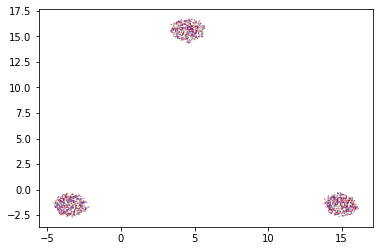

In [73]:
clustered = (labels >= 0)
# plt.scatter(standard_embedding[~clustered, 0],
#             standard_embedding[~clustered, 1],
#             color=(0.5, 0.5, 0.5),
#             s=0.1,
#             alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');